# Craft a Story from a Dataset

### Import and Load Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_palette("Paired")

In [123]:
# create url variable
url1 ='https://drive.google.com/file/d/1TAvsw2pSCm7a9soM1SyG7QWxIuR-mqRE/view?usp=share_link'

# get the data file ID
file_id1 = url1.split('/')[-2]

# create the read url
read_url1='https://drive.google.com/uc?id=' + file_id1

# read the CSV file into a DataFrame
df= pd.read_csv(read_url1).drop('row_id',axis=1)

# set the column type for column with date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# add columns
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

### Kaggle Store Data

This data contains the sales for three distinct types of Kaggle products that were sold at two stores in three countries from January 01, 2015 to December 31, 2018.

- Product - Kaggle Mug, Kaggle Hat and Kaggle Stikcer
- Store - KaggleMart and KaggleRama
- Country - Finland, Norway and Sweden 

In [124]:
df.head()

,date,country,store,product,num_sold,day_of_week,month,year
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,Thursday,1,2015
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,Thursday,1,2015
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,Thursday,1,2015
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,Thursday,1,2015
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,Thursday,1,2015


In [5]:
# creation of aggregated sales totals
agg_df = df.groupby(['country','store', 'product'])[['num_sold']].sum()
agg_df = agg_df.reset_index(drop=False).sort_values(by=['num_sold'],
  ascending=False).reset_index(drop=True)

agg_df

,country,store,product,num_sold
0,Norway,KaggleRama,Kaggle Hat,1514119
1,Sweden,KaggleRama,Kaggle Hat,1068652
2,Finland,KaggleRama,Kaggle Hat,918862
3,Norway,KaggleMart,Kaggle Hat,868777
4,Norway,KaggleRama,Kaggle Mug,853659
5,Sweden,KaggleMart,Kaggle Hat,612472
6,Sweden,KaggleRama,Kaggle Mug,600870
7,Finland,KaggleMart,Kaggle Hat,529583
8,Finland,KaggleRama,Kaggle Mug,520278
9,Norway,KaggleMart,Kaggle Mug,488515


### Overall Sales Trends

- Kaggle Hat had the most sales, while Kaggle Stickers were the least popular.
- The countries with the highest sales were Norway, followed by Sweden and Finland. 
- KaggleRama sold 1.7 times more products than KaggleMart.


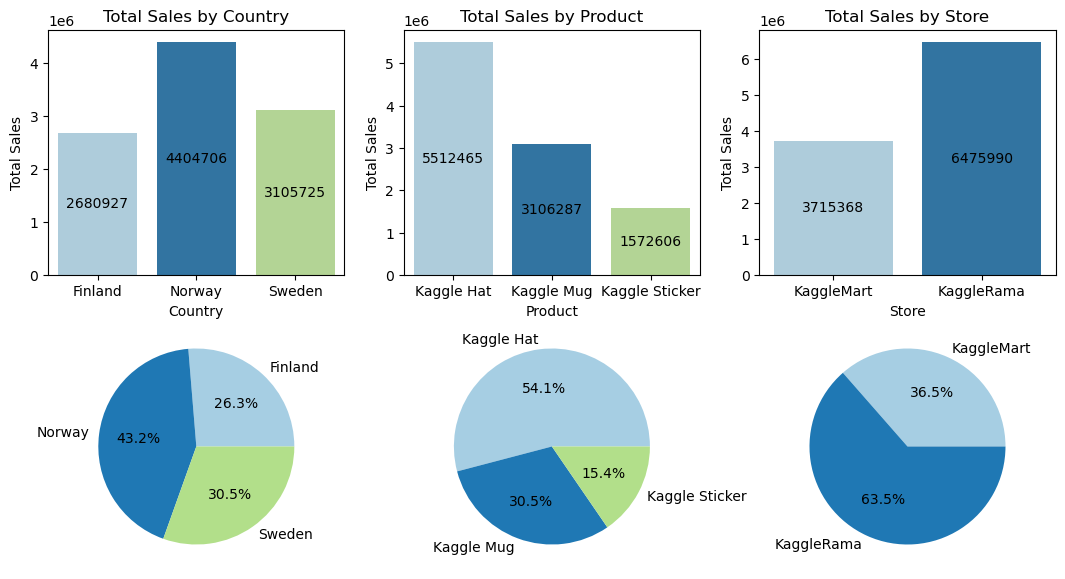

In [121]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(13, 7))

ax0 = sns.barplot(ax=axes[0,0], data=agg_df.groupby('country')['num_sold'].sum().reset_index(), x='country', y='num_sold',ci=None);
axes[0,0].bar_label(ax0.containers[0],fmt="%.0f", label_type='center')
axes[0,0].set(title='Total Sales by Country', xlabel = 'Country', ylabel = 'Total Sales')

ax1 = sns.barplot(ax=axes[0,1], data=agg_df.groupby('product')['num_sold'].sum().reset_index(), x='product', y='num_sold',ci=None);
axes[0,1].bar_label(ax1.containers[0],fmt="%.0f", label_type='center')
axes[0,1].set(title='Total Sales by Product', xlabel = 'Product', ylabel = 'Total Sales')

ax0 = sns.barplot(ax=axes[0,2], data=agg_df.groupby('store')['num_sold'].sum().reset_index(), x='store', y='num_sold',ci=None);
axes[0,2].bar_label(ax0.containers[0],fmt="%.0f", label_type='center')
axes[0,2].set(title='Total Sales by Store', xlabel = 'Store', ylabel = 'Total Sales')

axes[1,0].pie(agg_df.groupby('country')['num_sold'].sum().values, labels = agg_df.groupby('country')['num_sold'].sum().index,  autopct='%0.1f%%')
axes[1,1].pie(agg_df.groupby('product')['num_sold'].sum().values, labels = agg_df.groupby('product')['num_sold'].sum().index,  autopct='%0.1f%%')
axes[1,2].pie(agg_df.groupby('store')['num_sold'].sum().values, labels = agg_df.groupby('store')['num_sold'].sum().index,  autopct='%0.1f%%')

plt.show()

### Yearly Sales Pattern


- There has been a steady increase in sales across all three countries, indicating a consistent upward trend of growth.

- While most countries saw a consistent rise in sales between 2015 and 2018, Norway experienced a decline in sales from 2015 to 2016. However, this temporary decrease did not impede the overall upward trend in sales.


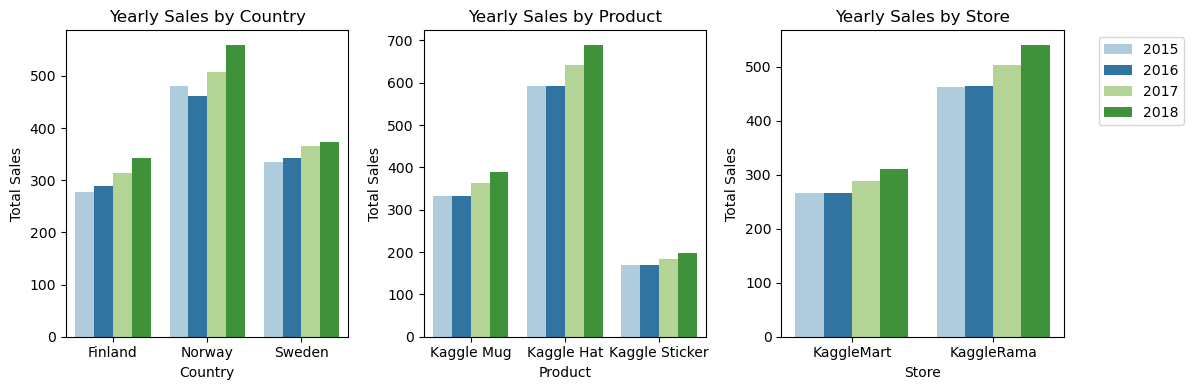

In [137]:
fig, axes = plt.subplots(ncols=3,figsize=(12, 4))

ax0 = sns.barplot(ax=axes[0], data=df, x='country' , y = 'num_sold' , hue='year',ci=None)
axes[0].set(title='Yearly Sales by Country', xlabel = 'Country', ylabel = 'Total Sales')
ax0.get_legend().remove()

ax1 = sns.barplot(ax=axes[1], data=df, x='product' , y = 'num_sold' , hue='year',ci=None)
axes[1].set(title='Yearly Sales by Product', xlabel = 'Product', ylabel = 'Total Sales')
ax1.get_legend().remove() 

sns.barplot(ax=axes[2], data=df, x='store' , y = 'num_sold' , hue='year',ci=None)
axes[2].set(title='Yearly Sales by Store', xlabel = 'Store', ylabel = 'Total Sales')
axes[2].legend(loc='upper right',bbox_to_anchor=(1.45, 1)) 

plt.tight_layout()  
plt.show()  

### Seasonal Sales Patterns

- The peak seasons of the year are spring (March to May) and winter (December and January).
- The sales plot for each month exhibits a consistent pattern across stores and countries.
- Each product exhibits a different seasonal pattern. Kaggle Hats showing the largest seasonal variation. Kaggle Hat reach its highest sales peak in April and December while experiencing a minimum in September and October. Kaggle Mug, on the other hand, has its peak sales in December but experiences a dip in July and August. Interestingly, Stickers have consistently steady sales throughout the year, regardless of country or store.


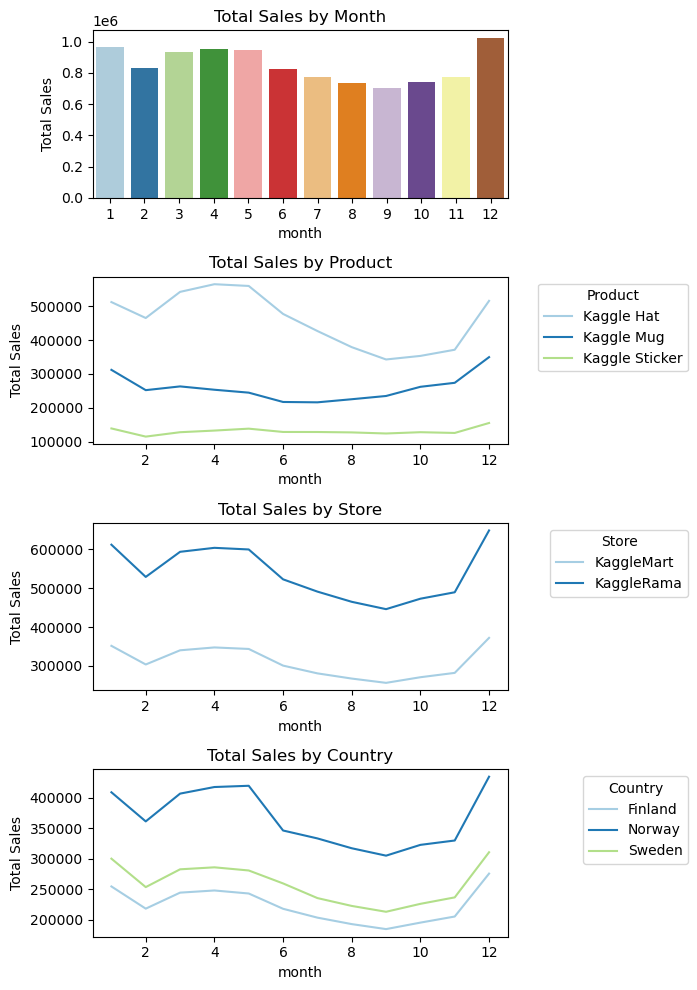

In [140]:
fig, axes = plt.subplots(4, 1, figsize=(8,10));

sns.barplot(ax=axes[0], data =df.groupby(['month']).sum()['num_sold'].reset_index(), 
            x='month',y='num_sold');

sns.lineplot(ax=axes[1],data=df.groupby(['month','product']).sum()['num_sold'].reset_index(),
            x='month',y='num_sold',hue='product');

sns.lineplot(ax=axes[2],data=df.groupby(['month','store']).sum()['num_sold'].reset_index(),
            x='month',y='num_sold',hue='store');

sns.lineplot(ax=axes[3],data=df.groupby(['month','country']).sum()['num_sold'].reset_index(),
            x='month',y='num_sold',hue='country');

axes[0].set(title='Total Sales by Month',xlabel = 'month', ylabel = 'Total Sales')
axes[1].set(title='Total Sales by Product',xlabel = 'month', ylabel = 'Total Sales')
axes[2].set(title='Total Sales by Store',xlabel = 'month', ylabel = 'Total Sales')
axes[3].set(title='Total Sales by Country',xlabel = 'month', ylabel = 'Total Sales')

axes[1].legend(title='Product',loc='upper right',bbox_to_anchor=(1.45, 1));
axes[2].legend(title='Store',loc='upper right',bbox_to_anchor=(1.45, 1))
axes[3].legend(title='Country',loc='upper right',bbox_to_anchor=(1.45, 1))

fig.tight_layout()

### Weakly Sales Patterns

- Sales remain relatively stable during weekdays but experience a spike on weekends.


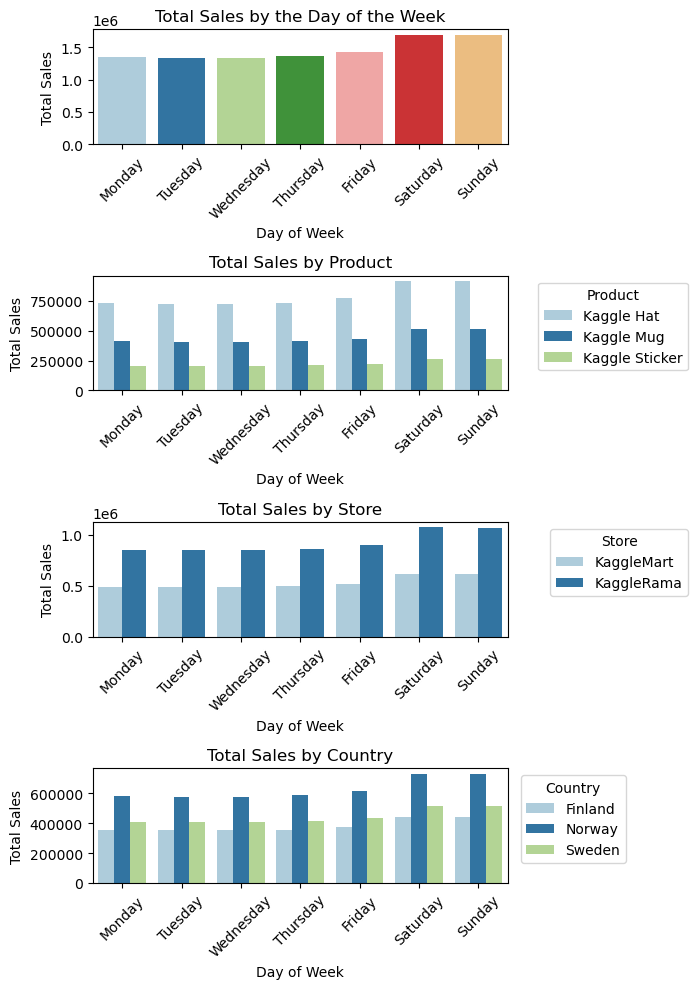

In [141]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


fig, axes = plt.subplots(4, 1, figsize=(8,10));

sns.barplot(ax=axes[0], data =df.groupby(['day_of_week']).sum()['num_sold'].reset_index(), 
            x='day_of_week',y='num_sold',order=day);

sns.barplot(ax=axes[1],data=df.groupby(['day_of_week','product']).sum()['num_sold'].reset_index(), 
            x='day_of_week',y='num_sold',hue='product',order=day);

sns.barplot(ax=axes[2],data=df.groupby(['day_of_week','store']).sum()['num_sold'].reset_index(), 
            x='day_of_week',y='num_sold',hue='store',order=day);

sns.barplot(ax=axes[3],data=df.groupby(['day_of_week','country']).sum()['num_sold'].reset_index(), 
            x='day_of_week',y='num_sold',hue='country',order=day);

axes[0].set(title='Total Sales by the Day of the Week',xlabel = 'Day of Week', ylabel = 'Total Sales')
axes[1].set(title='Total Sales by Product',xlabel = 'Day of Week', ylabel = 'Total Sales')
axes[2].set(title='Total Sales by Store',xlabel = 'Day of Week', ylabel = 'Total Sales')
axes[3].set(title='Total Sales by Country',xlabel = 'Day of Week', ylabel = 'Total Sales')

axes[1].legend(title='Product',loc='upper right',bbox_to_anchor=(1.45, 1));
axes[2].legend(title='Store',loc='upper right',bbox_to_anchor=(1.45, 1));
axes[3].legend(title='Country',loc='upper right',bbox_to_anchor=(1.3, 1));



axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)
axes[2].tick_params('x', labelrotation=45)
axes[3].tick_params('x', labelrotation=45)

fig.tight_layout()

### Overall Trends of Indiviual Product

- The sales trends of the same product remain relatively consistent across the store and country, despite seasonal fluctuations. Interestingly, all three products experience a worldwide surge in sales during the month of December.

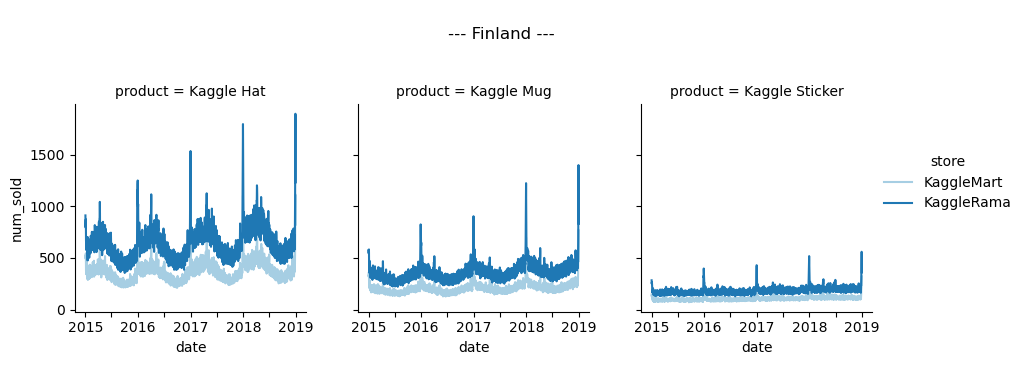

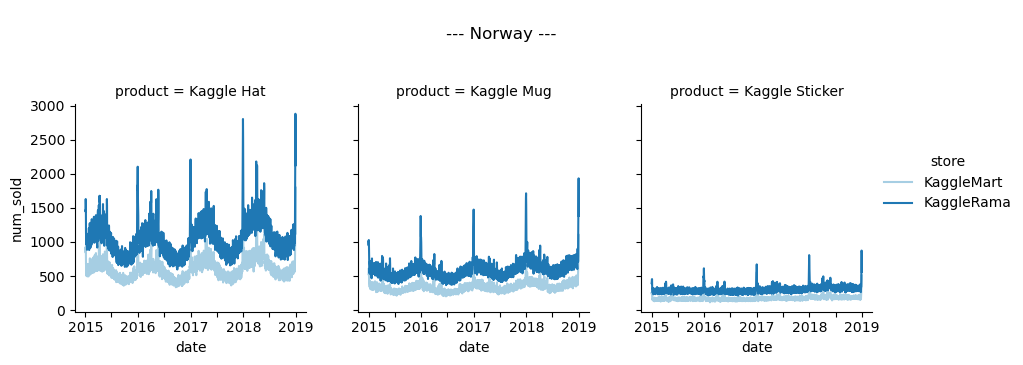

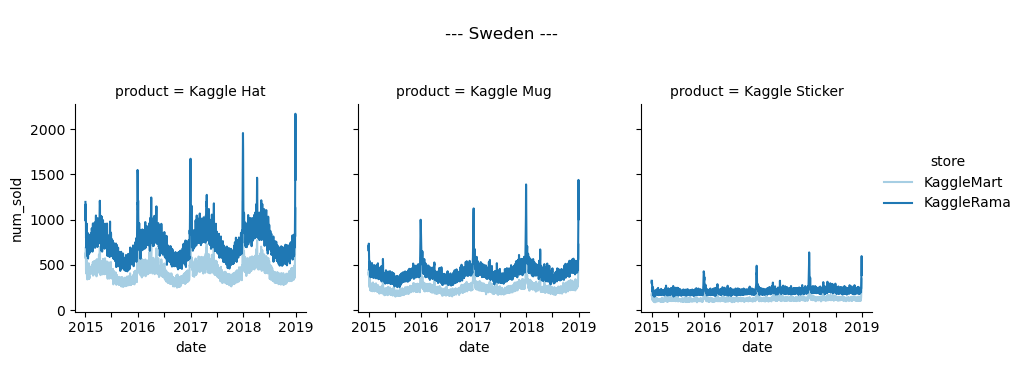

In [142]:
# create a FacetGrid with filtered data for Finland
g1 = (sns.FacetGrid(df[df['country']=='Finland'].groupby(['date','product','store']).sum()['num_sold'].reset_index(), 
                    col="product", hue ='store'));
g1.map(sns.lineplot, 'date',  'num_sold');
g1.set_xticklabels(['2015','','2016','','2017','','2018','','2019'])
g1.add_legend()
g1.fig.suptitle('\n--- Finland ---\n',y=1.2)

# create a FacetGrid with filtered data for Norway
g2 = (sns.FacetGrid(df[df['country']=='Norway'].groupby(['date','product','store']).sum()['num_sold'].reset_index(), 
                    col="product", hue ='store'));
g2.map(sns.lineplot, 'date',  'num_sold');
g2.set_xticklabels(['2015','','2016','','2017','','2018','','2019'])
g2.add_legend()
g2.fig.suptitle('\n--- Norway ---\n',y=1.2)

# create a FacetGrid with filtered data for Sweden
g3 = (sns.FacetGrid(df[df['country']=='Sweden'].groupby(['date','product','store']).sum()['num_sold'].reset_index(), 
                    col="product", hue ='store'));
g3.map(sns.lineplot, 'date',  'num_sold');
g3.set_xticklabels(['2015','','2016','','2017','','2018','','2019'])
g3.add_legend()
g3.fig.suptitle('\n--- Sweden ---\n',y=1.2);